<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/select_best_model_wine_classification_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A difficult classification problem: the Portuguese wine quality data set

Some suggestions about how to read and processe this data set are available at
https://colab.research.google.com/drive/1XX6GidW1AqY5gBbdXsoRxQ84xnVcg6a9?usp=sharing#scrollTo=doH9_-gnf3sz

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Download and read the data

In [3]:
# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")
# fill the `is_red` column with zeros.
white_df["is_red"] = 0 # YOUR CODE HERE
# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

In [4]:
# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")
# fill the `is_red` column with ones.
red_df["is_red"] = 1 # YOUR CODE HERE
# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [24]:
df = pd.concat([red_df, white_df], ignore_index=True)
if False: df=df.loc[df['is_red']==1] # only reds
if False: df=df.loc[df['is_red']==0] # only whites
response = 'quality'
response = 'is_red' 

## Visualize and preprocess the data

The response variable is `quality`.

In [25]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [26]:
# TO DO: does the data set has NaN?
df.isnull().sum()
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

In [27]:
# TO DO: what are the explanatory variables?
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_red'],
      dtype='object')

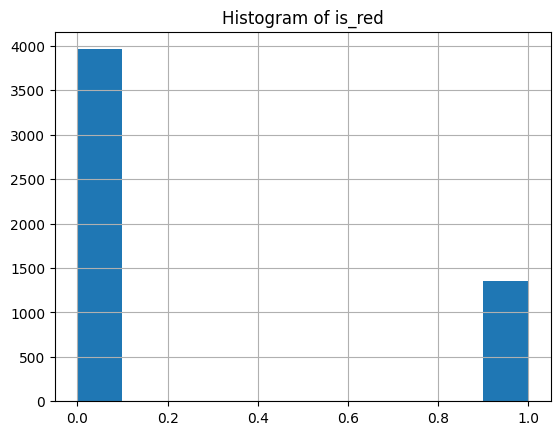

In [28]:
df[response].hist(bins=df[response].nunique()*5)
plt.title('Histogram of ' + response)
plt.show()

In [29]:
# get data with wine quality greater than 4 and less than 8
# df = df[(df['quality'] > 4) & (df['quality'] < 8)]

In [30]:
# Create features and target variables
X = df.drop(columns=['quality','is_red'])
y = df[response]
classes=np.sort(y.unique())
classes


array([0, 1])

In [32]:
if df[response].nunique() >2:
  # Represent classes in the 1st discriminant plane:
  lda = LinearDiscriminantAnalysis(n_components=2)
  X_r = lda.fit(X, y).transform(X)
  colors = sns.color_palette(None, len(classes))
  lw = 2
  for color, cl in zip(colors, classes):
      plt.scatter(X_r[y == cl, 0], X_r[y == cl, 1], color=color, alpha=.8, lw=lw, label=cl)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title('LDA of wine quality')
  plt.show()

In [33]:
if df[response].nunique() >2:
  # Create separate subplots for each class
  fig, axs = plt.subplots(1, 3, figsize=(12, 4))

  # Set the range for x-axis and y-axis in all subplots
  for ax in axs.flat:
      ax.set_xlim(-5, 4)  # Replace xmin and xmax with your desired range for the x-axis
      ax.set_ylim(-7, 6)  # Replace ymin and ymax with your desired range for the y-axis


  # Plot each class on a different subplot
  for i in range(len(classes)):
      axs[i].scatter(X_r[y == classes[i], 0], X_r[y == classes[i], 1], label=f'Class {classes[i]}')
      axs[i].set_xlabel('Principal Discriminant Axis 1')
      axs[i].set_ylabel('Principal Discriminant Axis 2')
      axs[i].legend()

  plt.tight_layout()
  plt.show()

## Random Forest classifier

Next, we search for the best hyperparameters for a RF classifier with `RandomizedSearchCV`.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
# Perform the random search
random_search.fit(X_train, y_train)
# Get the best hyperparameters and model
best_params = random_search.best_params_
print(best_params)
best_model = random_search.best_estimator_  # retrieve the best model
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Model Accuracy: 0.5770676691729323


In [19]:
random_search.cv_results_['mean_test_score']

array([0.56250503, 0.56203445, 0.56931668, 0.56908415, 0.56038877,
       0.56062434, 0.54605297, 0.54887153, 0.56743847, 0.56720318])

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(best_model, X, y, cv=5)
confusion_matrix(y,y_pred)

array([[   0,    0,   17,   13,    0,    0,    0],
       [   0,    3,  136,   65,    2,    0,    0],
       [   0,    3, 1023,  707,   19,    0,    0],
       [   0,    2,  783, 1359,  178,    1,    0],
       [   0,    0,  146,  500,  208,    2,    0],
       [   0,    0,   12,   91,   45,    0,    0],
       [   0,    0,    1,    1,    3,    0,    0]])

## Explore the importance of features

### Impurity-based feature importance

                 Feature  Importance
10               alcohol    0.124964
7                density    0.102539
1       volatile acidity    0.099004
6   total sulfur dioxide    0.090839
9              sulphates    0.089452
5    free sulfur dioxide    0.087810
4              chlorides    0.085363
3         residual sugar    0.084136
8                     pH    0.083587
2            citric acid    0.077340
0          fixed acidity    0.074967


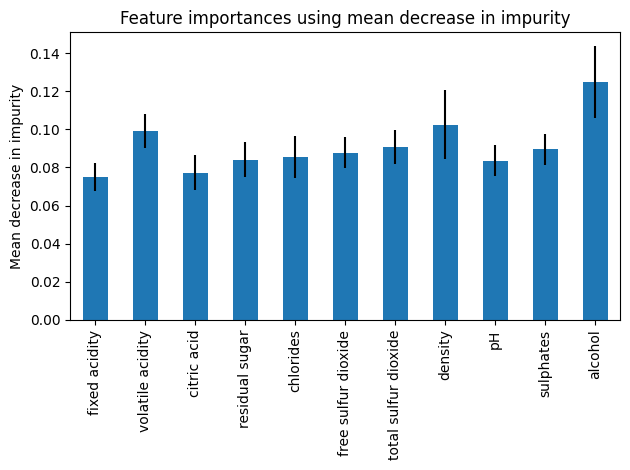

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rfc = RandomForestClassifier()
# Fit the classifier to your data
rfc.fit(X_train, y_train)
# Get feature importances
importance_scores = rfc.feature_importances_
# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print the feature importance
print(feature_importance_df)
# plot
# compute std
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
# plot
forest_importances = pd.Series(importance_scores, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Permutation importance

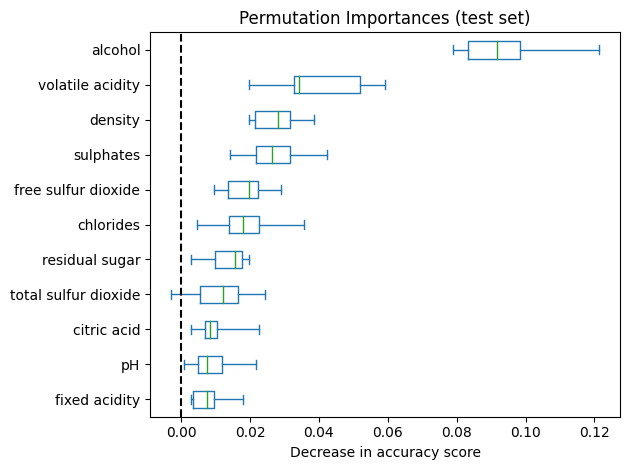

In [35]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## Multiple layer perceptron (NN) 

The search for a good architecture is done with `GridSearchCV`.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
Xstd=scaler.transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Standardize
scaler = StandardScaler().fit(X_train)
Xstd=scaler.transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xstd, y, test_size=0.2, random_state=42)
# define and train classifier
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(16,8), max_iter=1000,learning_rate_init=0.01,momentum=0.9, activation='relu')
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5754812563323202


In [ ]:

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [ (16,8,4), (16,8),(32,16,8)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'learning_rate': [ 'adaptive'],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
print(best_params)
print(grid_search.cv_results_['mean_test_score'])
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

{'activation': 'relu', 'hidden_layer_sizes': (16, 8), 'learning_rate': 'adaptive', 'solver': 'adam'}
[0.57200208 0.58594861 0.56008666]
Best Model Accuracy: 0.5916919959473151


In [ ]:
print(best_params)
print(grid_search.cv_results_['mean_test_score'])

{'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'learning_rate': 'adaptive', 'solver': 'adam'}
[0.53852242 0.55768997 0.5350925 ]


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
y0=0*(y==5)+1*(y==6)+2*(y==7)
X_train, X_test, y_train, y_test = train_test_split(X, y0, test_size=0.2, random_state=42)

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Convert the predicted labels to integers
y_pred = y_pred.astype(int)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5957446808510638
